# MINI-PROJET STAT INFERENTIELLE

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import missingno as msno # Visualiser les NaN

## Importation et lecture du Jeu de données 

In [3]:
donnees = pd.read_csv("satisfaction_hopital.csv", sep=';')

In [4]:
df = donnees.copy()

In [63]:
df.head()

,service,sexe,age,profession,AmelioSante,AmelioMorale,recommander,ScoreRelation,ScoreInfo
0,3,0,41.0,4.0,1.0,0.0,1.0,36.0,22.0
1,3,1,29.0,8.0,2.0,3.0,2.0,33.0,36.0
2,3,1,83.0,2.0,2.0,1.0,2.0,40.0,37.0
3,3,0,66.0,3.0,2.0,0.0,2.0,32.0,35.0
4,3,1,84.0,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   service        534 non-null    category
 1   sexe           534 non-null    category
 2   age            528 non-null    float64 
 3   profession     427 non-null    category
 4   AmelioSante    376 non-null    category
 5   AmelioMorale   383 non-null    category
 6   recommander    405 non-null    category
 7   ScoreRelation  349 non-null    float64 
 8   ScoreInfo      358 non-null    float64 
dtypes: category(6), float64(3)
memory usage: 17.1 KB


In [65]:
# Renommer les colonnes
df.rename(columns={'amelioration.sante':'AmelioSante', 'amelioration.moral':'AmelioMorale', 
                   'score.relation':'ScoreRelation', 'score,information':'ScoreInfo'}, inplace=True)

In [66]:
df.head()

,service,sexe,age,profession,AmelioSante,AmelioMorale,recommander,ScoreRelation,ScoreInfo
0,3,0,41.0,4.0,1.0,0.0,1.0,36.0,22.0
1,3,1,29.0,8.0,2.0,3.0,2.0,33.0,36.0
2,3,1,83.0,2.0,2.0,1.0,2.0,40.0,37.0
3,3,0,66.0,3.0,2.0,0.0,2.0,32.0,35.0
4,3,1,84.0,NaN,NaN,NaN,NaN,NaN,NaN


## Changer le type des colonnes

In [67]:
col = ['service', 'sexe', 'profession', 'AmelioSante', 'AmelioMorale', 'recommander']
for nom in col: 
    df[nom]=df[nom].astype('category')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   service        534 non-null    category
 1   sexe           534 non-null    category
 2   age            528 non-null    float64 
 3   profession     427 non-null    category
 4   AmelioSante    376 non-null    category
 5   AmelioMorale   383 non-null    category
 6   recommander    405 non-null    category
 7   ScoreRelation  349 non-null    float64 
 8   ScoreInfo      358 non-null    float64 
dtypes: category(6), float64(3)
memory usage: 17.1 KB


In [69]:
df.describe(include='category')

,service,sexe,profession,AmelioSante,AmelioMorale,recommander
count,534,534,427.0,376.0,383.0,405.0
unique,8,2,8.0,4.0,4.0,3.0
top,5,0,3.0,3.0,1.0,2.0
freq,71,268,124.0,161.0,179.0,269.0


In [70]:
df.describe()

,age,ScoreRelation,ScoreInfo
count,528.000000,349.000000,358.000000
mean,58.212121,35.217765,31.910615
std,17.809249,4.623606,6.793295
min,18.000000,13.000000,13.000000
25%,45.000000,33.000000,28.000000
50%,60.000000,36.000000,33.000000
75%,72.000000,39.000000,38.000000
max,97.000000,40.000000,40.000000


## Visualisation des NaN

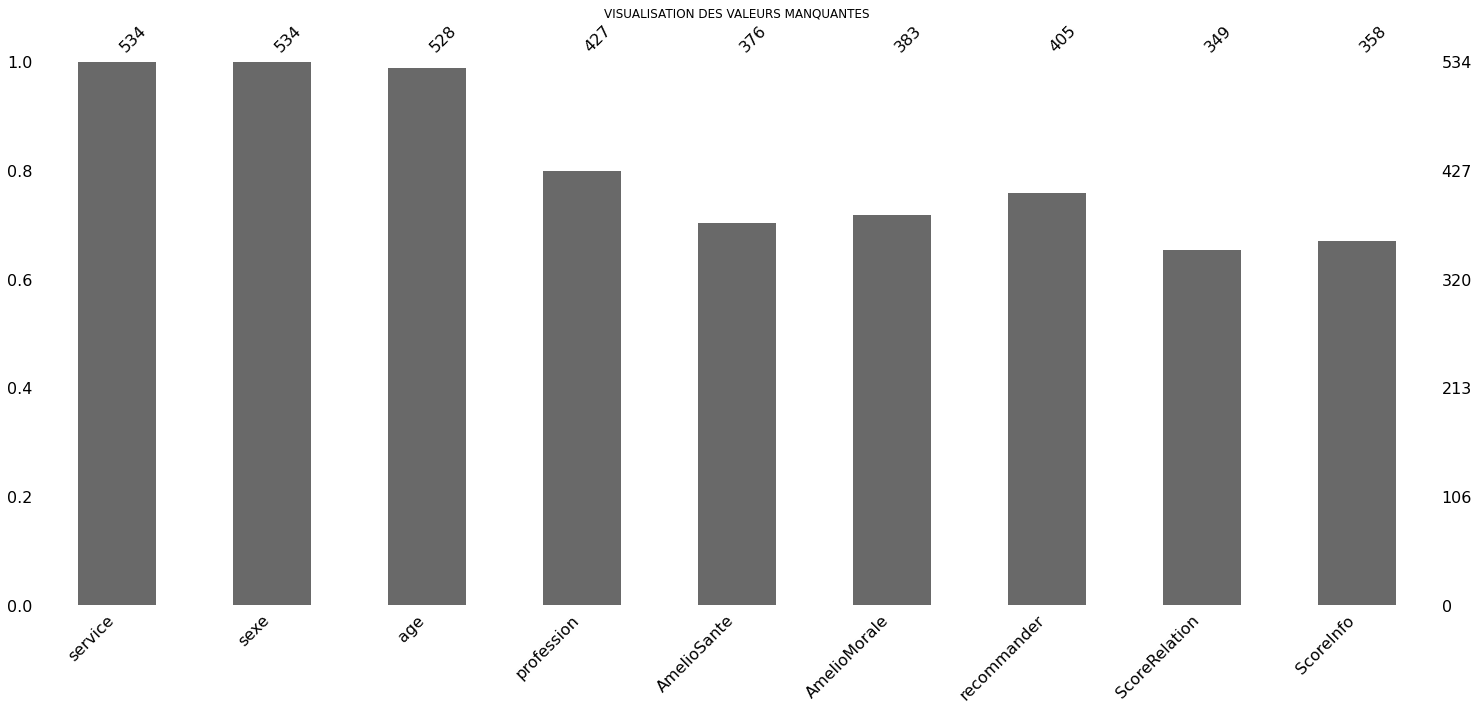

In [73]:
msno.bar(df)
plt.title('VISUALISATION DES VALEURS MANQUANTES')
plt.show()

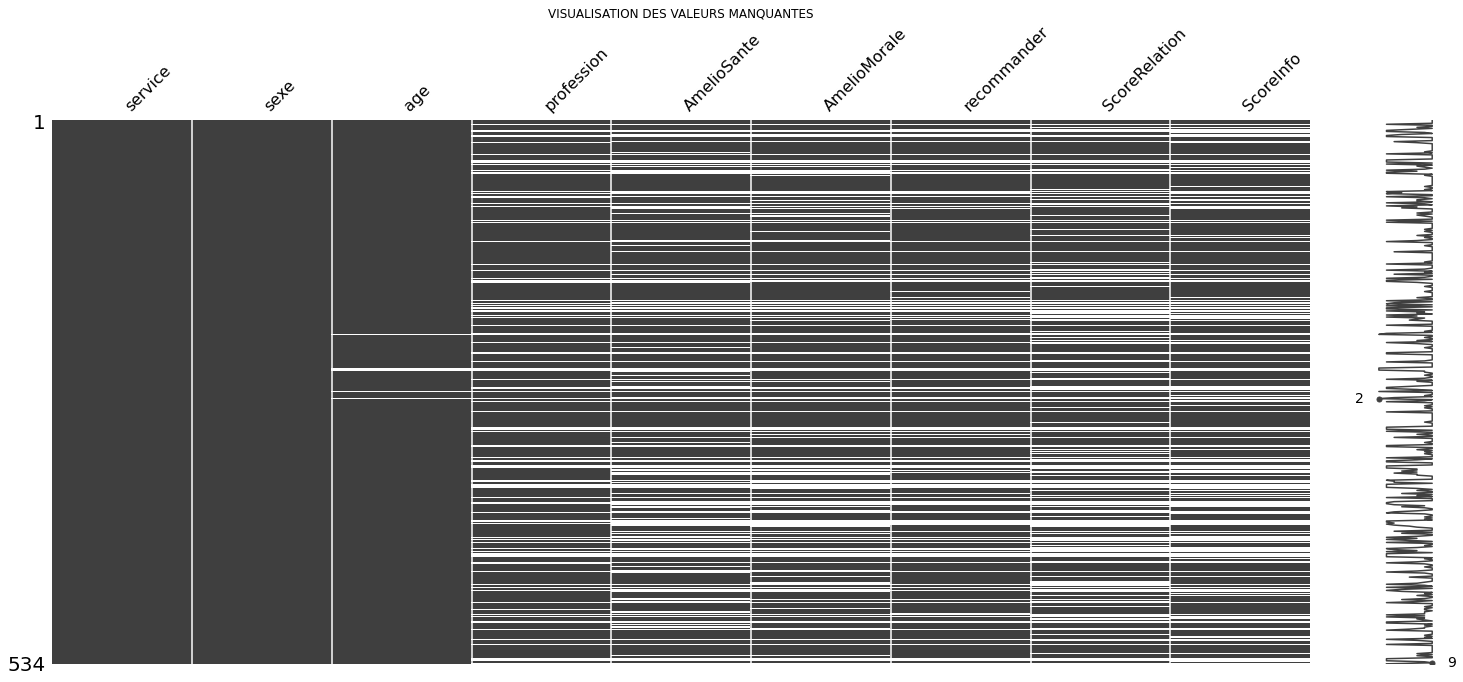

In [75]:
msno.matrix(df)
plt.title('VISUALISATION DES VALEURS MANQUANTES')
plt.show()

<AxesSubplot:>

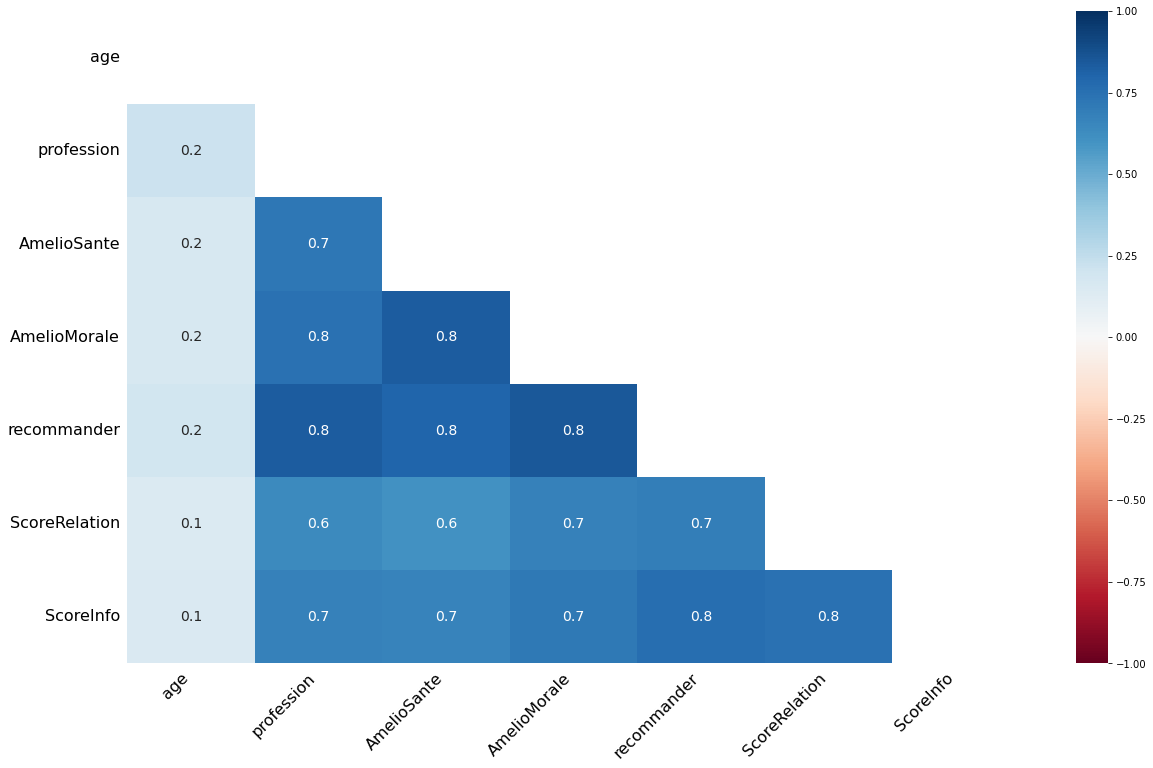

In [15]:
msno.heatmap(df)
plt.title('VISUALISATION DES VALEURS MANQUANTES')
plt.show()

## Traitement des valeurs manquantes 

In [17]:
# Comptage des NaN
df.isna().sum()

service            0
sexe               0
age                6
profession       107
AmelioSante      158
AmelioMorale     151
recommander      129
ScoreRelation    185
ScoreInfo        176
dtype: int64

In [18]:
# Pourcentage des NaN
round(df.isna().mean(), 2)*100

service           0.0
sexe              0.0
age               1.0
profession       20.0
AmelioSante      30.0
AmelioMorale     28.0
recommander      24.0
ScoreRelation    35.0
ScoreInfo        33.0
dtype: float64

In [76]:
# import the KNNimputer class
from sklearn.impute import KNNImputer

In [77]:
# create an object for KNNImputer
imputer = KNNImputer(n_neighbors=10)

In [78]:
# Imputation
dfImputer = imputer.fit_transform(df)

In [79]:
df_nan = pd.DataFrame(dfImputer)
df_nan.head()

,0,1,2,3,4,5,6,7,8
0,3.0,0.0,41.0,4.0,1.0,0.0,1.0,36.0,22.0
1,3.0,1.0,29.0,8.0,2.0,3.0,2.0,33.0,36.0
2,3.0,1.0,83.0,2.0,2.0,1.0,2.0,40.0,37.0
3,3.0,0.0,66.0,3.0,2.0,0.0,2.0,32.0,35.0
4,3.0,1.0,84.0,4.5,2.5,1.1,1.8,37.2,30.3


In [23]:
# Renommer les colonnes
df_nan.rename(columns={0:'service', 1:'sexe', 2:'age', 3:'profession', 4:'AmelioSante', 5:'AmelioMorale', 6:'recommander', 
                   7:'ScoreRelation', 8:'ScoreInfo'}, inplace=True)

In [24]:
df_nan

,service,sexe,age,profession,AmelioSante,AmelioMorale,recommander,ScoreRelation,ScoreInfo
0,3.0,0.0,41.0,4.0,1.0,0.0,1.0,36.0,22.0
1,3.0,1.0,29.0,8.0,2.0,3.0,2.0,33.0,36.0
2,3.0,1.0,83.0,2.0,2.0,1.0,2.0,40.0,37.0
3,3.0,0.0,66.0,3.0,2.0,0.0,2.0,32.0,35.0
4,3.0,1.0,84.0,4.5,2.5,1.1,1.8,37.2,30.3
...,...,...,...,...,...,...,...,...,...
529,8.0,1.0,81.0,5.3,2.6,2.2,1.5,35.4,27.7
530,8.0,0.0,69.0,3.8,2.3,1.6,1.7,35.3,29.2
531,8.0,1.0,30.0,4.0,2.0,1.0,1.0,32.0,33.4
532,8.0,1.0,30.0,8.0,1.0,2.0,2.0,30.0,34.0


In [25]:
df.columns

Index(['service', 'sexe', 'age', 'profession', 'AmelioSante', 'AmelioMorale',
       'recommander', 'ScoreRelation', 'ScoreInfo'],
      dtype='object')

In [26]:
df_nan.isna().sum()

service          0
sexe             0
age              0
profession       0
AmelioSante      0
AmelioMorale     0
recommander      0
ScoreRelation    0
ScoreInfo        0
dtype: int64

In [27]:
j=[]
for i in range(9):
    i = i
    j.append(i)
print(j)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [28]:
for i in range(3):
    print(i)

0
1
2


## Traitement des doublons

In [29]:
len(df_nan[df_nan.duplicated()])

12

In [30]:
df_nan[df_nan.duplicated().sort_values()]

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_4232\1626410291.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_nan[df_nan.duplicated().sort_values()]


,service,sexe,age,profession,AmelioSante,AmelioMorale,recommander,ScoreRelation,ScoreInfo
10,3.0,1.0,84.0,4.5,2.5,1.1,1.8,37.2,30.3
41,4.0,0.0,83.0,4.4,2.6,1.3,1.7,36.0,29.8
52,4.0,0.0,81.0,3.9,2.1,1.4,1.5,34.0,30.2
75,4.0,0.0,78.0,4.3,2.3,1.7,1.7,35.2,29.9
243,5.0,0.0,41.0,3.9,2.4,1.8,1.3,36.0,31.6
245,5.0,0.0,41.0,3.9,2.4,1.8,1.3,36.0,31.6
263,5.0,1.0,63.0,3.4,2.6,2.2,1.6,36.6,33.7
266,5.0,0.0,41.0,3.9,2.4,1.8,1.3,36.0,31.6
273,5.0,1.0,54.8,4.5,2.1,1.8,1.6,34.8,32.4
394,2.0,1.0,82.0,3.9,2.0,1.3,1.6,33.9,30.5


In [31]:
df_nan[df_nan.duplicated()].describe()

,service,sexe,age,profession,AmelioSante,AmelioMorale,recommander,ScoreRelation,ScoreInfo
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,4.166667,0.500000,67.233333,4.141667,2.308333,1.583333,1.541667,35.508333,31.225000
std,1.267304,0.522233,18.053422,0.464089,0.215146,0.315748,0.167649,1.130131,1.227062
min,2.000000,0.000000,41.000000,3.400000,2.000000,1.100000,1.300000,33.900000,29.800000
25%,3.750000,0.000000,51.350000,3.900000,2.100000,1.300000,1.450000,34.600000,30.275000
50%,4.500000,0.500000,77.000000,3.900000,2.350000,1.600000,1.600000,36.000000,31.050000
75%,5.000000,1.000000,82.000000,4.425000,2.425000,1.800000,1.625000,36.125000,31.800000
max,6.000000,1.000000,84.000000,5.200000,2.600000,2.200000,1.800000,37.200000,33.700000


In [32]:
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   service        534 non-null    float64
 1   sexe           534 non-null    float64
 2   age            534 non-null    float64
 3   profession     534 non-null    float64
 4   AmelioSante    534 non-null    float64
 5   AmelioMorale   534 non-null    float64
 6   recommander    534 non-null    float64
 7   ScoreRelation  534 non-null    float64
 8   ScoreInfo      534 non-null    float64
dtypes: float64(9)
memory usage: 37.7 KB


In [33]:
col = ['service', 'sexe', 'profession', 'AmelioSante', 'AmelioMorale', 'recommander']
for nom in col: 
    df_nan[nom]=df_nan[nom].astype('int')

In [34]:
col = ['service', 'sexe', 'profession', 'AmelioSante', 'AmelioMorale', 'recommander']
for nom in col: 
    df_nan[nom]=df_nan[nom].astype('category')

In [35]:
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   service        534 non-null    category
 1   sexe           534 non-null    category
 2   age            534 non-null    float64 
 3   profession     534 non-null    category
 4   AmelioSante    534 non-null    category
 5   AmelioMorale   534 non-null    category
 6   recommander    534 non-null    category
 7   ScoreRelation  534 non-null    float64 
 8   ScoreInfo      534 non-null    float64 
dtypes: category(6), float64(3)
memory usage: 17.1 KB


In [36]:
df_nan.head()

,service,sexe,age,profession,AmelioSante,AmelioMorale,recommander,ScoreRelation,ScoreInfo
0,3,0,41.0,4,1,0,1,36.0,22.0
1,3,1,29.0,8,2,3,2,33.0,36.0
2,3,1,83.0,2,2,1,2,40.0,37.0
3,3,0,66.0,3,2,0,2,32.0,35.0
4,3,1,84.0,4,2,1,1,37.2,30.3


In [37]:
df_nan.describe()

,age,ScoreRelation,ScoreInfo
count,534.000000,534.000000,534.000000
mean,58.070412,35.330150,31.672472
std,17.772052,3.832395,5.845186
min,18.000000,13.000000,13.000000
25%,45.000000,33.800000,28.000000
50%,59.000000,36.000000,32.350000
75%,72.000000,38.000000,36.000000
max,97.000000,40.000000,40.000000


In [38]:
df_nan.describe(include='category')

,service,sexe,profession,AmelioSante,AmelioMorale,recommander
count,534,534,534,534,534,534
unique,8,2,8,4,4,3
top,5,0,3,2,1,2
freq,71,268,156,271,307,273


In [39]:
dfOk=df_nan.drop_duplicates()

In [40]:
dfOk.head()

,service,sexe,age,profession,AmelioSante,AmelioMorale,recommander,ScoreRelation,ScoreInfo
0,3,0,41.0,4,1,0,1,36.0,22.0
1,3,1,29.0,8,2,3,2,33.0,36.0
2,3,1,83.0,2,2,1,2,40.0,37.0
3,3,0,66.0,3,2,0,2,32.0,35.0
4,3,1,84.0,4,2,1,1,37.2,30.3


In [41]:
len(dfOk[dfOk.duplicated()])

0

## Traitement des valeurs aberrantes

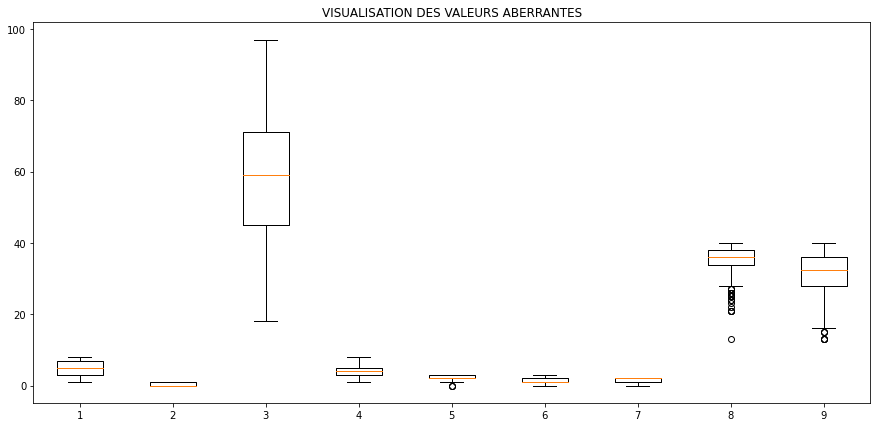

In [48]:
plt.figure(figsize=(15, 7))
plt.boxplot(dfOk)
plt.title('VISUALISATION DES VALEURS ABERRANTES')
plt.xticks()
plt.show() 

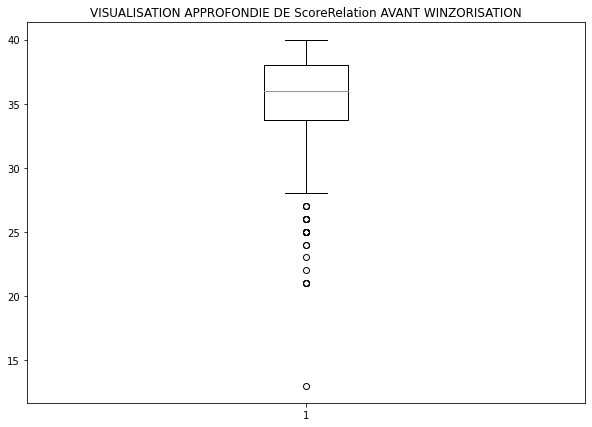

In [60]:
plt.figure(figsize=(10, 7))
plt.boxplot(dfOk['ScoreRelation'])
plt.title('VISUALISATION APPROFONDIE DE ScoreRelation AVANT WINZORISATION')
plt.show() 

In [44]:
from scipy.stats.mstats import winsorize # Pour Winzorizer

In [91]:
dfOk.loc[:,('ScoreRelation')]

0      36.0
1      33.0
2      40.0
3      32.0
4      37.2
       ... 
529    35.4
530    35.3
531    32.0
532    30.0
533    36.0
Name: ScoreRelation, Length: 522, dtype: float64

In [92]:
dfOk.loc[:,('ScoreRelation')] = winsorize(dfOk.loc[:,('ScoreRelation')], (0.05,0.05))

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_4232\1174329566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfOk.loc[:,('ScoreRelation')] = winsorize(dfOk.loc[:,('ScoreRelation')], (0.05,0.05))


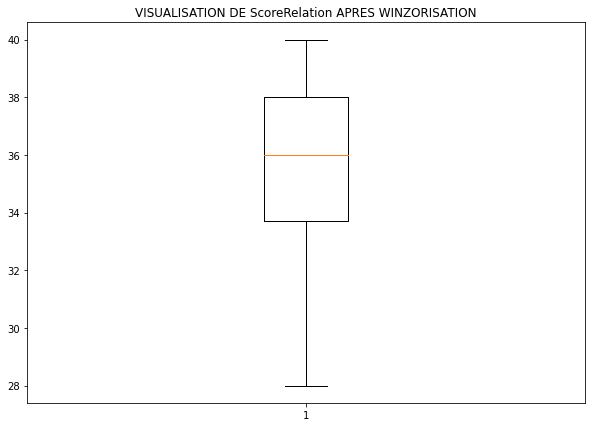

In [93]:
plt.figure(figsize=(10, 7))
plt.boxplot(dfOk['ScoreRelation'])
plt.title('VISUALISATION DE ScoreRelation APRES WINZORISATION')
plt.show()

# Stat Univariée

## Variables Numeriques

### Variable age

In [97]:
age = dfOk.loc[:, 'age']

C:\Users\THINKPAD\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


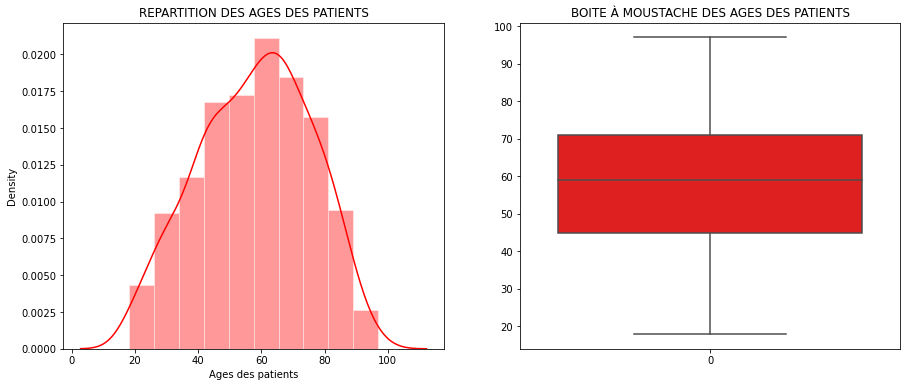

In [187]:
# Histogramme
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.distplot(a=age, bins=10, color='red',
             hist_kws={"edgecolor": 'white'})
plt.xlabel('Ages des patients')
plt.title("REPARTITION DES AGES DES PATIENTS")

# Boîte à moustaches 
plt.subplot(122)
sns.boxplot(data=age, color='red')
# plt.xlabel('Ages des patients')
plt.title("BOITE À MOUSTACHE DES AGES DES PATIENTS")
plt.show()

In [120]:
# Test de normalité
stats.normaltest(age)

NormaltestResult(statistic=30.938546800468213, pvalue=1.9132861301853655e-07)

In [188]:
# Resumé stat de l'age
round(age.describe(), 0)

count    522.0
mean      58.0
std       18.0
min       18.0
25%       45.0
50%       59.0
75%       71.0
max       97.0
Name: age, dtype: float64

In [160]:
age.skewness

-0.16862279829393007

In [162]:
age.kurtosis()

-0.7189577831487912

In [173]:
TabEffAge = age.value_counts().reset_index().rename(columns={'index':'Age', 'age':'Nombre'})

In [174]:
TabEffAge.sort_values(by='Age').head()

,Age,Nombre
62,18.0,3
72,19.0,2
69,20.0,2
57,21.0,3
65,22.0,3


### Variable ScoreRelation

In [175]:
ScoreRelation = dfOk.loc[:, 'ScoreRelation']

C:\Users\THINKPAD\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


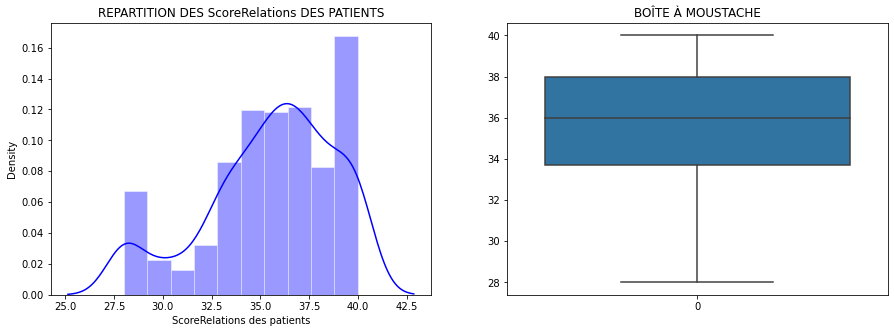

In [184]:
# Histogramme
plt.figure(figsize=(15,5))
plt.subplot(121)
# sns.histplot(ScoreRelation)
sns.distplot(a=ScoreRelation, bins=10, color='blue',
             hist_kws={"edgecolor": 'white'})
plt.xlabel('ScoreRelations des patients')
plt.title("REPARTITION DES ScoreRelations DES PATIENTS")

# Boîte à moustaches 
plt.subplot(122)
sns.boxplot(data=ScoreRelation)
# plt.xlabel('Score des patients')
plt.title("BOÎTE À MOUSTACHE")
plt.show()

In [248]:
i=0
res = [0, 0, 0]
for col in dfOk.columns:
        if dfOk[col].dtype=='float64':
            for i in range(3):
                res[i]=stats.normaltest(dfOk[col])
        print(res)
        

[0, 0, 0]
[0, 0, 0]
[NormaltestResult(statistic=30.938546800468213, pvalue=1.9132861301853655e-07), NormaltestResult(statistic=30.938546800468213, pvalue=1.9132861301853655e-07), NormaltestResult(statistic=30.938546800468213, pvalue=1.9132861301853655e-07)]
[NormaltestResult(statistic=30.938546800468213, pvalue=1.9132861301853655e-07), NormaltestResult(statistic=30.938546800468213, pvalue=1.9132861301853655e-07), NormaltestResult(statistic=30.938546800468213, pvalue=1.9132861301853655e-07)]
[NormaltestResult(statistic=30.938546800468213, pvalue=1.9132861301853655e-07), NormaltestResult(statistic=30.938546800468213, pvalue=1.9132861301853655e-07), NormaltestResult(statistic=30.938546800468213, pvalue=1.9132861301853655e-07)]
[NormaltestResult(statistic=30.938546800468213, pvalue=1.9132861301853655e-07), NormaltestResult(statistic=30.938546800468213, pvalue=1.9132861301853655e-07), NormaltestResult(statistic=30.938546800468213, pvalue=1.9132861301853655e-07)]
[NormaltestResult(statistic=

In [278]:
#Fonction pour faire le test de Normalité 

res = [0, 0, 0]

for col in dfOk.columns:
    if dfOk[col].dtype == 'float64':
        for i in range(3):
            res[i] = stats.normaltest(dfOk[col]).pvalue
        print(f"La p-value de _{col}_ est: {res[0]}")
        
if (res[0]>0.05)==True:
    print("On accepte H0, la distribution est normale.")
else:
    print("On rejette H0, la distribution n'est pas normale.")

La p-value de _age_ est: 1.9132861301853655e-07
La p-value de _ScoreRelation_ est: 2.6384468784958472e-08
La p-value de _ScoreInfo_ est: 2.5309664767507705e-09
On rejette H0, la distribution n'est pas normale.


In [287]:
res = []

for col in dfOk.columns:
    if dfOk[col].dtype == 'float64':
        p_values = [stats.normaltest(dfOk[col]).pvalue]
        res.append((col, p_values))

for col, p_values in res:
    print(f"La p-value du test de normalité pour la colonne {col} est : {p_values}")

    if all(p_value > 0.05 for p_value in p_values):
        print(f"On accepte H0 pour la colonne {col}, la distribution est normale.\n")
    else:
        print(f"On rejette H0 pour la colonne {col}, la distribution n'est pas normale.\n")


La p-value du test de normalité pour la colonne age est : [1.9132861301853655e-07]
On rejette H0 pour la colonne age, la distribution n'est pas normale.

La p-value du test de normalité pour la colonne ScoreRelation est : [2.6384468784958472e-08]
On rejette H0 pour la colonne ScoreRelation, la distribution n'est pas normale.

La p-value du test de normalité pour la colonne ScoreInfo est : [2.5309664767507705e-09]
On rejette H0 pour la colonne ScoreInfo, la distribution n'est pas normale.



In [211]:
# Test de normalité
res2 = stats.normaltest(ScoreRelation)
if (res2.pvalue>0.05)==True:
    print("On accepte H0, la distribution est normale.")
else:
    print("On rejette H0, la distribution n'est pas normale.")

On rejette H0, la distribution n'est pas normale.
